In [1]:
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [6]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


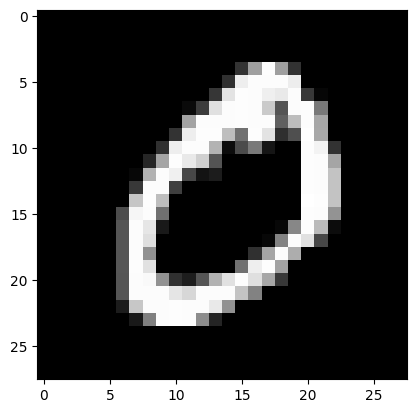

In [9]:
plt.imshow(x_train[1], cmap ='gray')

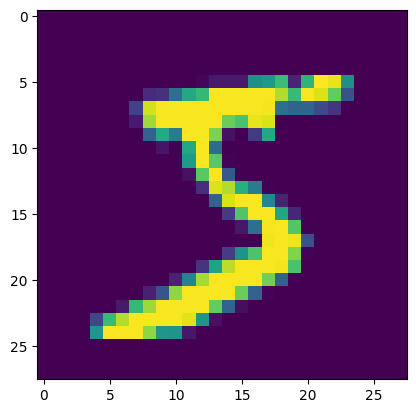

In [10]:
plt.imshow(x_train[0])

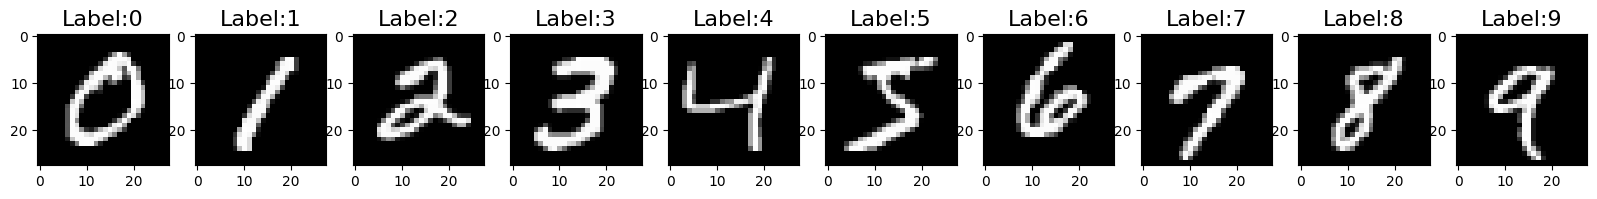

In [11]:
num_classes =10
f,ax=plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
    sample = x_train[y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label:{}".format(i),fontsize=16)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [14]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
for i in range(10):
    print(y_train[i])
y_train.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


(60000, 10)

In [15]:
x_train = x_train/255
x_test= x_test/255
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [17]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2692 - accuracy: 0.9174
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1231 - accuracy: 0.9641
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0878 - accuracy: 0.9740
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0733 - accuracy: 0.9786
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9820
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0515 - accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9868
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0403 - accuracy: 0.9876
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9895
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.03

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1194 - accuracy: 0.9783


[0.11937921494245529, 0.9782999753952026]

In [23]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(prediction[0])

In [27]:
model.save('HWDModel.h5')